# **MACHINE LEARNING**

Sisfy Anjani

dataset yang digunakan :
[heart desiase](https://drive.google.com/file/d/1ozQbaSe_eUOiFvE1UxZChYDogfQNTiux/view?usp=sharing)

## info data

In [ ]:
#connect to drive
from google.colab import drive
drive.mount('/content/drive/', force_remount=True)

Mounted at /content/drive/


In [ ]:
import pandas as pd
import numpy as np
import math, time, random, datetime
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from xgboost import XGBClassifier
from sklearn.metrics import roc_auc_score, roc_curve, auc

df = pd.read_csv('/content/drive/MyDrive/MSIB Startup Campus DSAI Batch 6 /Dataset/heart.csv')
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1


In [ ]:
#jumlah kolom dan baris
df.shape

(1025, 14)

In [ ]:
#Mengelompokkan kolom yang bersifat numerical dan categorical
categoricals = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal', 'target']
numericals = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']

## Data Preparation

### cek missing value



In [ ]:
#cek tipe data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [ ]:
#cek missing value
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64



*   tidak ada missing value




### data duplikat



In [ ]:
#melihat apakah ada data duplikat
df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
1020     True
1021     True
1022     True
1023     True
1024     True
Length: 1025, dtype: bool

In [ ]:
#jumlah data duplikat
print('jumlah data duplikat adalah', df.duplicated().sum())

jumlah data duplikat adalah 723


In [ ]:
#bersihkan data duplikat
df.drop_duplicates(inplace=True)

#melihat kembali data duplikat
df.duplicated().sum()

0

In [ ]:
#menampilkan data setelah duplikat 723 baris
df1 = df.drop_duplicates()
df1

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
723,68,0,2,120,211,0,0,115,0,1.5,1,0,2,1
733,44,0,2,108,141,0,1,175,0,0.6,1,0,2,1
739,52,1,0,128,255,0,1,161,1,0.0,2,1,3,0
843,59,1,3,160,273,0,0,125,0,0.0,2,0,2,0




>tersisa 302 baris setelah di duplikat dengan 14 kolom.



### melihat outlier

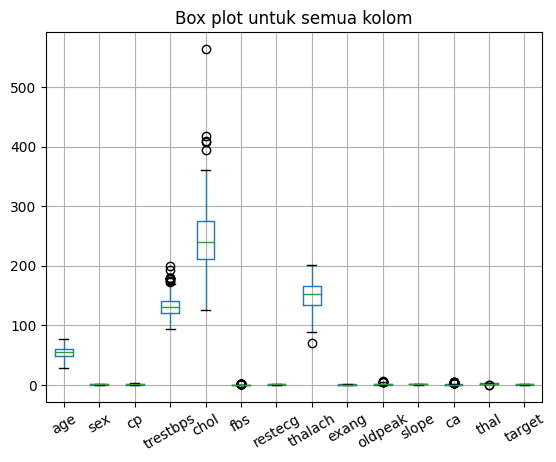

In [ ]:
import matplotlib.pyplot as plt
#Menampilkan boxplot semua kolom
df1.boxplot()
plt.title('Box plot untuk semua kolom')
plt.xticks(rotation=30)
plt.show()

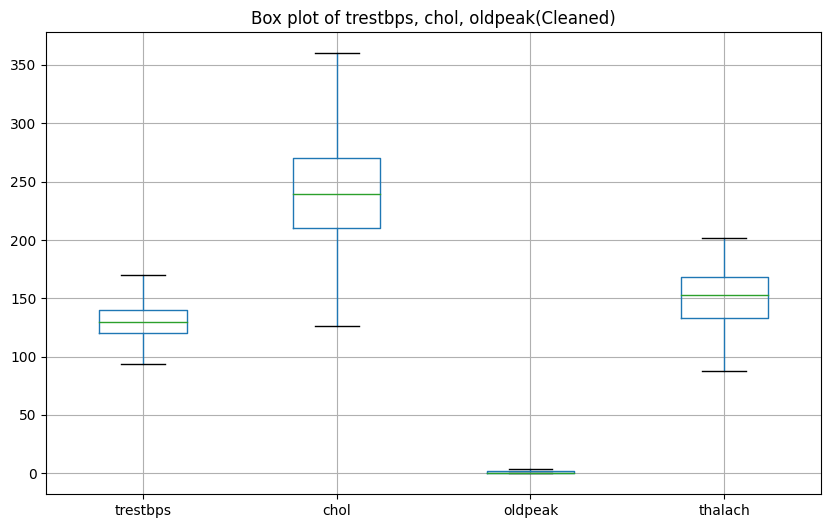

In [ ]:
# Menghitung quartal1 dan quartal3
q1 = df1[['trestbps', 'chol', 'oldpeak', 'thalach']].quantile(0.25)
q3 = df1[['trestbps', 'chol', 'oldpeak', 'thalach']].quantile(0.75)

# Menghitung iqr
iqr = q3 - q1

# Menghitung batas bawah dan batas atas
Lower = q1 - 1.5 * iqr
Upper = q3 + 1.5 * iqr

# Identifikasi dan Hapus outlier dari DataFrame
df1_cleaned = df1[
                  (df1['trestbps'] >= Lower['trestbps']) & (df1['trestbps'] <= Upper['trestbps']) &
                  (df1['chol'] >= Lower['chol']) & (df1['chol'] <= Upper['chol']) &
                  (df1['oldpeak'] >= Lower['oldpeak']) & (df1['oldpeak'] <= Upper['oldpeak']) &
                  (df1['thalach'] >= Lower['thalach']) & (df1['thalach'] <= Upper['thalach'])
                  ]

# Tampilkan box plot setelah menghapus outlier
plt.figure(figsize=(10,6))
df1_cleaned.boxplot(column=['trestbps', 'chol', 'oldpeak', 'thalach'])
plt.title('Box plot of trestbps, chol, oldpeak(Cleaned)')
plt.show()


In [ ]:
df1

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
723,68,0,2,120,211,0,0,115,0,1.5,1,0,2,1
733,44,0,2,108,141,0,1,175,0,0.6,1,0,2,1
739,52,1,0,128,255,0,1,161,1,0.0,2,1,3,0
843,59,1,3,160,273,0,0,125,0,0.0,2,0,2,0


In [ ]:
from sklearn.preprocessing import OneHotEncoder

#mempersiapkan encoder
encoder = OneHotEncoder(sparse_output = False, drop = "first")

#Apply encoder
encoded = encoder.fit_transform(df[['thal','ca','slope','exang','restecg','fbs','cp','sex']])
feature_names = encoder.get_feature_names_out(['thal','ca','slope','exang','restecg','fbs','cp','sex'])
df_ohe = pd.DataFrame(encoded,columns = feature_names)
df_ohe.head()

,thal_1,thal_2,thal_3,ca_1,ca_2,ca_3,ca_4,slope_1,slope_2,exang_1,restecg_1,restecg_2,fbs_1,cp_1,cp_2,cp_3,sex_1
0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0


## Eksploratory Data Analysis (EDA)

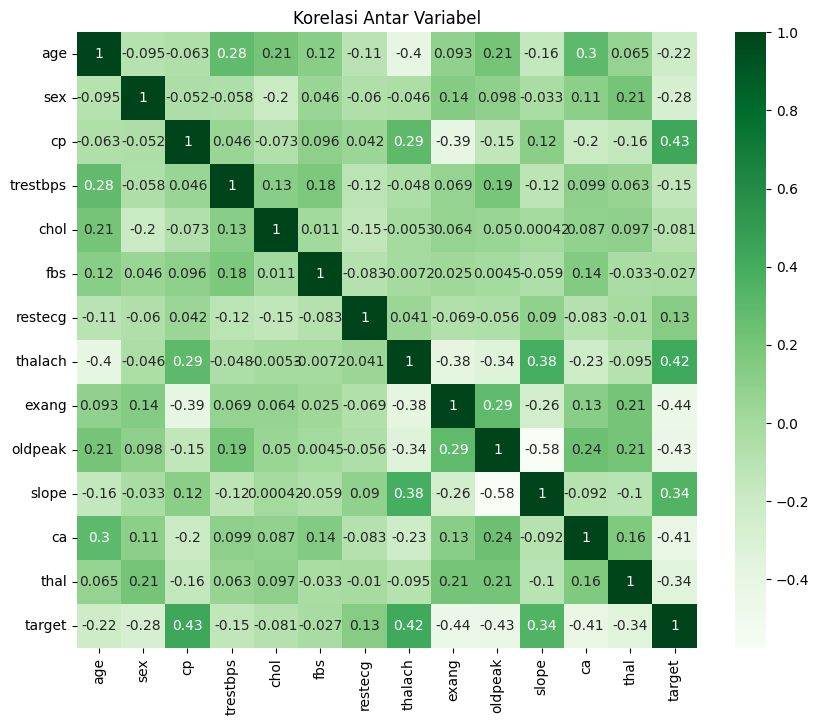

In [ ]:
plt.figure(figsize=(10,8))
sns.heatmap(df1.corr(), annot=True, cmap='Greens')
plt.title("Korelasi Antar Variabel")
plt.show()



> korelasi antara target dengan kolom cp, thalach dab slope cukup besar artinya memiliki korelasi yang cukup erat antar satu sama lain, sehingga memiliki ikatan yang cukup saling berkaitan.



## 1. Metode Unsupervised atau Supervised




> Termasuk kedalam **Supervised Learning** karena memiliki label serta tujuan tiap kolom yang saling bersangkutan, dengan tujuan akhir untuk melihat berapa penderita penyakit jantung berdasarkan data yang telah ada **(Classification).**

 **Klasifikasi**: Model ini digunakan ketika target yang diinginkan adalah label atau kelas. Contoh model yang termasuk  Support Vector Machine (SVM), Random Forest, Neural Networks, K-Nearest Neighbors(KNN), Decision Trees dan Naive Bayes.







## 2. Alasan memilih metode





> Model yang digunakan beserta alasan :
1.  **Random Forest** -> Karena biasanya merupakan pilihan yang solid untuk digunakan pada data yang sederhana maupun kompleks karena kemampuannya yang kuat dalam mengatasi banyak masalah umum seperti overfitting dan ketidakseimbangan kelas serta pengambilan pohon keputusan.
2.  **K-Nearest Neighbors (KNN)** -> karena dapat bekerja dengan baik untuk data sederhana karena konsepnya yang sederhana misalkan menghitung jarak antara titik data dan tetangganya untuk menentukan kelasnya.
3.  **Decision Trees** -> karena cocok untuk data sederhana karena mereka mampu menangani kombinasi linear dan non-linear dari fitur dengan baik.
4.  **Naive Bayes** -> karena menjadi pilihan yang baik untuk data sederhana, terutama ketika fitur-fiturnya saling independen dan berdistribusi dengan baik.







## 3. Eksekusi Marchine Learning model


In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.utils import resample
#Memisahkan fitur (x) dan label (y)
x = df1.drop('target', axis=1)
y = df1['target']

#Memisahkan data Train dan data Test
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

#melihat shape tiap fitur(x) dan label(y)
print('shape of x : ', x.shape)
print('shape of y : ', y.shape)

shape of x :  (302, 13)
shape of y :  (302,)


> Setelah kita cek shape nya terlihat bahwa variabel fitur memiliki 13 kolom dan variabel target hanya memiliki satu kolom.

In [ ]:
#melihat shape data Train dan data test
print('shape of x_train : ', x_train.shape)
print('shape of y_train : ', y_train.shape)
print('shape of x_test : ', x_test.shape)
print('shape of y_test : ', y_test.shape)

shape of x_train :  (241, 13)
shape of y_train :  (241,)
shape of x_test :  (61, 13)
shape of y_test :  (61,)




> dapat dilihat bahwa dari 302 baris data dibagi menjadi 241 data train dan 61 data test.



In [ ]:
#total panjang baris data pada dataframe
total_length = len(df1)
df1_length = int(0.8 * total_length) #80% data train dan 20% data test

# bagi dalam dataframe
train = df1[:df1_length]
test = df1[df1_length:]

# Reset index dari dataframe
train = train.reset_index(drop=True)
test = test.reset_index(drop=True)




> Jika dataset memiliki jumlah data False Negatif dan False Positif yang seimbang (Symmetric), maka bisa gunakan **Accuracy**, tetapi jika tidak seimbang, maka sebaiknya menggunakan **F1-Score**.

> Dalam suatu problem, jika lebih memilih False Positif lebih baik terjadi daripada False Negatif, misalnya: Dalam kasus Fraud/Scam, kecenderungan model mendeteksi transaksi sebagai fraud walaupun kenyataannya bukan, dianggap lebih baik, daripada transaksi tersebut tidak terdeteksi sebagai fraud tetapi ternyata fraud. Untuk problem ini sebaiknya menggunakan **Recall**.

> Sebaliknya, jika lebih menginginkan terjadinya True Negatif dan sangat tidak menginginkan terjadinya False Positif, sebaiknya menggunakan **Precision**.

referensi : https://reyvanmaulid.medium.com/machine-learning-with-python-for-beginner-1e6c1d283580






### 1.   **Random Forest**



In [ ]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(random_state=42)
model.fit(x_train,y_train)

y_pred = model.predict(x_test)

print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print(y_pred.shape)

              precision    recall  f1-score   support

           0       0.89      0.78      0.83        32
           1       0.79      0.90      0.84        29

    accuracy                           0.84        61
   macro avg       0.84      0.84      0.84        61
weighted avg       0.84      0.84      0.84        61

[[25  7]
 [ 3 26]]
(61,)


In [ ]:
#Evaluasi model performance
print('Training Accuracy : ', model.score(x_train, y_train))
print('Testing Accuracy : ', model.score(x_test, y_test))

#confusion metrix
print('\nConfusion Metrix : ')
print(confusion_matrix(y_test, y_pred))

Training Accuracy :  1.0
Testing Accuracy :  0.8360655737704918

Confusion Metrix : 
[[25  7]
 [ 3 26]]




> karena false negatif =3 dan false positif=7 yang tidak simetrik maka menggunakan **F1-Score** dan karena FP lebih baik daripada FN maka gunakan **recall** untuk mengukur performa model.



### 2. **K-Nearest Neighbors (KNN)**



In [ ]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier()
model.fit(x_train,y_train)

y_pred = model.predict(x_test)

print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print(y_pred.shape)


              precision    recall  f1-score   support

           0       0.78      0.44      0.56        32
           1       0.58      0.86      0.69        29

    accuracy                           0.64        61
   macro avg       0.68      0.65      0.63        61
weighted avg       0.68      0.64      0.62        61

[[14 18]
 [ 4 25]]
(61,)


In [ ]:
#Evaluasi model performance
print('Training Accuracy : ', model.score(x_train, y_train))
print('Testing Accuracy : ', model.score(x_test, y_test))

#confusion metrix
print('\nConfusion Metrix : ')
print(confusion_matrix(y_test, y_pred))

Training Accuracy :  0.7634854771784232
Testing Accuracy :  0.639344262295082

Confusion Metrix : 
[[14 18]
 [ 4 25]]




> karena false negatif =4 dan false positif=18 yang tidak simetrik maka menggunakan **F1-Score** dan karena FP jauh lebih baik daripada FN maka gunakan **recall** untuk mengukur performa model.



### 3. **Decision Trees**

In [ ]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(random_state=42)
model.fit(x_train,y_train)

y_pred = model.predict(x_test)

print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print(y_pred.shape)

              precision    recall  f1-score   support

           0       0.74      0.78      0.76        32
           1       0.74      0.69      0.71        29

    accuracy                           0.74        61
   macro avg       0.74      0.74      0.74        61
weighted avg       0.74      0.74      0.74        61

[[25  7]
 [ 9 20]]
(61,)


In [ ]:
#Evaluasi model performance
print('Training Accuracy : ', model.score(x_train, y_train))
print('Testing Accuracy : ', model.score(x_test, y_test))

#confusion metrix
print('\nConfusion Metrix : ')
print(confusion_matrix(y_test, y_pred))

Training Accuracy :  1.0
Testing Accuracy :  0.7377049180327869

Confusion Metrix : 
[[25  7]
 [ 9 20]]




> karena false negatif=9 dan false positif=7 dimana sedikit jauh jaraknya namun lebih baik kita mendeteksi dia terkena penyakit jantung tapi ternyata tidak dibandingkan jika kita deteksi dia tidak memiliki penyakit jantung padahal memiliki sehingga digunakan **recall** dan karena True Negatif =20 jauh lebih besar dari False Positif=7 maka gunakan **Precision** untuk menghitung performa model.



### 4. **Naive Bayes**

In [ ]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(x_train, y_train)

y_pred = model.predict(x_test)

print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print(y_pred.shape)

              precision    recall  f1-score   support

           0       0.87      0.84      0.86        32
           1       0.83      0.86      0.85        29

    accuracy                           0.85        61
   macro avg       0.85      0.85      0.85        61
weighted avg       0.85      0.85      0.85        61

[[27  5]
 [ 4 25]]
(61,)


In [ ]:
#Evaluasi model performance
print('Training Accuracy : ', model.score(x_train, y_train))
print('Testing Accuracy : ', model.score(x_test, y_test))

#confusion metrix
print('\nConfusion Metrix : ')
print(confusion_matrix(y_test, y_pred))

Training Accuracy :  0.8381742738589212
Testing Accuracy :  0.8524590163934426

Confusion Metrix : 
[[27  5]
 [ 4 25]]




> False Negatif = 4 dan False Positif =5 maka kita gunakan metrix **f1-score** serta lebih baik kita prediksi seorang pasien terkena penyakit jantung padahal tidak daripada prediksi pasien tidak kena penyakit jantung padahal terkena maka gunakan **recall**.



## 4. Cross-validation basic

### Model Random Forest

karena diketahui dari Machine Learning model bahwa model Random Forest metix yang digunakan untuk mengecek performa model adalah dengan metrix **f1-score** dan **recall.**

In [ ]:
from sklearn.model_selection import cross_validate, KFold
from sklearn.ensemble import RandomForestClassifier

# Model yang akan dievaluasi
model = RandomForestClassifier(random_state=42)

# Memisahkan data ke dalam lipatan
kf = KFold(n_splits=10, shuffle=True, random_state=42)

# Validasi silang dengan cross_validate di mana x adalah data fitur, y adalah label target
scoring = ['accuracy','f1','recall', 'precision']
scores = cross_validate(model, x, y, cv=kf, scoring=scoring)

# Cetak hasil validasi silang
for metric in scoring:
    mean_score = np.mean(scores['test_' + metric])
    print("Rata-rata", metric, ":", mean_score)

Rata-rata accuracy : 0.8178494623655915
Rata-rata f1 : 0.8360557274266951
Rata-rata recall : 0.866889159172441
Rata-rata precision : 0.8194869293671285




*   dapat dilihat bahwa rata-rata paling baik di recall 86,68% dilanjutkan dengan f1-score 83,6%.



In [ ]:
from sklearn.model_selection import cross_val_score, KFold

#model yang akan dievaluasi
model = RandomForestClassifier(random_state=42)

# Inisialisasi objek KFold untuk membagi data ke dalam lipatan
kf = KFold(n_splits=10, shuffle=True, random_state=42)

# validasi silang dengan cross_val_score dengan x adalah data fitur, y adalah label target
# scoring adalah metrik evaluasi yang ingin dihitung (misalnya, 'accuracy', 'precision', 'recall', 'f1', dll.)
# cv adalah objek lipatan (misalnya, KFold atau StratifiedKFold)
scores = cross_val_score(model, x, y, cv=kf, scoring='f1')

# Cetak skor validasi silang
print("Cross Validation Scores:", scores)

# Hitung rata-rata skor validasi silang
print("Mean CV Score:", scores.mean())


Cross Validation Scores: [0.84848485 0.8125     0.83870968 0.82051282 0.85714286 0.8125
 0.8        0.83333333 0.88888889 0.84848485]
Mean CV Score: 0.8360557274266951


In [ ]:
#model yang akan dievaluasi
model = RandomForestClassifier(random_state=42)

#membagi data ke dalam lipatan
kf = KFold(n_splits=10, shuffle=True, random_state=42)

# validasi silang dengan cross_val_score dengan x adalah data fitur, y adalah label target
scores = cross_val_score(model, x, y, cv=kf, scoring='recall')

# Cetak skor validasi silang
print("Cross Validation Scores:", scores)

# Hitung rata-rata skor validasi silang
print("Mean CV Score:", scores.mean())

Cross Validation Scores: [0.93333333 0.92857143 0.92857143 0.88888889 0.94736842 0.72222222
 0.71428571 0.78947368 0.94117647 0.875     ]
Mean CV Score: 0.866889159172441




> Dapat dilihat perbedaan yaitu **f1-score 83%** dan **recall 86%**, untuk model random forest lebih baik digunakan dengan matrix **recall**.



### Model K-Nearest Neighbors (KNN)

Sesuai dari Machine Learning model diatas bahwa model KNN menggunakan metrix **f1-score** dan **recall**.

In [ ]:
from sklearn.model_selection import cross_validate, KFold
from sklearn.neighbors import KNeighborsClassifier

# Model yang akan dievaluasi
model = KNeighborsClassifier()

# Memisahkan data ke dalam lipatan
kf = KFold(n_splits=10, shuffle=True, random_state=42)

# Validasi silang dengan cross_validate di mana x adalah data fitur, y adalah label target
scoring = ['accuracy','f1','recall', 'precision']
scores = cross_validate(model, x, y, cv=kf, scoring=scoring)

# Cetak hasil validasi silang
for metric in scoring:
    mean_score = np.mean(scores['test_' + metric])
    print("Rata-rata", metric, ":", mean_score)

Rata-rata accuracy : 0.6325806451612903
Rata-rata f1 : 0.6730789247665514
Rata-rata recall : 0.7133242419774928
Rata-rata precision : 0.6490936769964903




*   Dapat dilihat bahwa rata-rata paling bagus adalah metrix f1-score 67,3% dan recall 71,33%.


In [ ]:
from sklearn.model_selection import cross_val_score, KFold

#model yang akan dievaluasi
model = KNeighborsClassifier()

#membagi data kedalam lipatan
kf = KFold(n_splits=10, shuffle=True, random_state=42)

# validasi silang dengan cross_val_score dengan x adalah data fitur, y adalah label target
scores = cross_val_score(model, x, y, cv=kf, scoring='f1')

# Cetak skor validasi silang
print("Cross Validation Scores:", scores)

# Hitung rata-rata skor validasi silang
print("Mean CV Score:", scores.mean())



Cross Validation Scores: [0.62857143 0.7027027  0.68965517 0.57142857 0.8        0.70588235
 0.56       0.7        0.70588235 0.66666667]
Mean CV Score: 0.6730789247665514


In [ ]:
#model yang akan dievaluasi
model = KNeighborsClassifier()

#membagi data kedalam lipatan
kf = KFold(n_splits=10, shuffle=True, random_state=42)

# validasi silang dengan cross_val_score dengan x adalah data fitur, y adalah label target
scores = cross_val_score(model, x, y, cv=kf, scoring='recall')

# Cetak skor validasi silang
print("Cross Validation Scores:", scores)

# Hitung rata-rata skor validasi silang
print("Mean CV Score:", scores.mean())

Cross Validation Scores: [0.73333333 0.92857143 0.71428571 0.55555556 0.84210526 0.66666667
 0.5        0.73684211 0.70588235 0.75      ]
Mean CV Score: 0.7133242419774928




> rata-rata score terbaik pada model KNN pada matrix **recall** dengan **rata-rata score 71%** sedangkan **f1-score** memiliki **rata-rata score 67%**.



### Model Decision Trees

dari data Machine Learning Model diatas metrix yang bagus digunakan adalah **recall** dan **precision** .

In [ ]:
from sklearn.model_selection import cross_validate, KFold
from sklearn.tree import DecisionTreeClassifier

# Model yang akan dievaluasi
model = DecisionTreeClassifier(random_state=42)

# Memisahkan data ke dalam lipatan
kf = KFold(n_splits=10, shuffle=True, random_state=42)

# Validasi silang dengan cross_validate di mana x adalah data fitur, y adalah label target
scoring = ['accuracy','f1','recall', 'precision']
scores = cross_validate(model, x, y, cv=kf, scoring=scoring)

# Cetak hasil validasi silang
for metric in scoring:
    mean_score = np.mean(scores['test_' + metric])
    print("Rata-rata", metric, ":", mean_score)

Rata-rata accuracy : 0.7648387096774194
Rata-rata f1 : 0.7815504101161995
Rata-rata recall : 0.7900106884859206
Rata-rata precision : 0.7825168871376302




*   Sesuai dengan pemahaman eksekusi machine learning bahwa metrix recall dan precision lebih baik digunakan untuk model Decision Trees, dengan recall 79% dan precision 78,25%.



In [ ]:
from sklearn.model_selection import cross_val_score, KFold

#model yang akan dievaluasi
model = DecisionTreeClassifier(random_state=42)

#membagi data kedalam lipatan
kf = KFold(n_splits=10, shuffle=True, random_state=42)

# validasi silang dengan cross_val_score dengan x adalah data fitur, y adalah label target
scores = cross_val_score(model, x, y, cv=kf, scoring='recall')

# Cetak skor validasi silang
print("Cross Validation Scores:", scores)

# Hitung rata-rata skor validasi silang
print("Mean CV Score:", scores.mean())

Cross Validation Scores: [0.93333333 0.71428571 0.85714286 0.77777778 0.89473684 0.72222222
 0.57142857 0.78947368 0.76470588 0.875     ]
Mean CV Score: 0.7900106884859206


In [ ]:
#model yang akan dievaluasi
model = DecisionTreeClassifier(random_state=42)

#membagi data kedalam lipatan
kf = KFold(n_splits=10, shuffle=True, random_state=42)

# validasi silang dengan cross_val_score dengan x adalah data fitur, y adalah label target
scores = cross_val_score(model, x, y, cv=kf, scoring='precision')

# Cetak skor validasi silang
print("Cross Validation Scores:", scores)

# Hitung rata-rata skor validasi silang
print("Mean CV Score:", scores.mean())

Cross Validation Scores: [0.82352941 0.625      0.85714286 0.82352941 0.80952381 0.86666667
 0.72727273 0.78947368 0.86666667 0.63636364]
Mean CV Score: 0.7825168871376302




>perbedaan nya tidak terlalu jauh tapi yang lebih baik adalah metrix **recall** dengan rata-rata score adalah 79% sedangkan metrix **precision** 78%.



### Model Naive Bayes

sesuai dengan data pada Machine Learning Model diatas bahwa pada model Naive Bayes metrix yang baik untuk digunakan adalah **f1-score** dan **recall**.

In [ ]:
from sklearn.model_selection import cross_validate, KFold
from sklearn.naive_bayes import GaussianNB

# Model yang akan dievaluasi
model = GaussianNB()

# Memisahkan data ke dalam lipatan
kf = KFold(n_splits=10, shuffle=True, random_state=42)

# Validasi silang dengan cross_validate di mana x adalah data fitur, y adalah label target
scoring = ['accuracy','f1','recall', 'precision']
scores = cross_validate(model, x, y, cv=kf, scoring=scoring)

# Cetak hasil validasi silang
for metric in scoring:
    mean_score = np.mean(scores['test_' + metric])
    print("Rata-rata", metric, ":", mean_score)

Rata-rata accuracy : 0.8210752688172043
Rata-rata f1 : 0.8367819871729608
Rata-rata recall : 0.8583836429308566
Rata-rata precision : 0.8204515913223343




*   rata-rata terbaik ada di f1-score 83,67% dan recall 85,83%.



In [ ]:
from sklearn.model_selection import cross_val_score, KFold

#model yang akan dievaluasi
model = GaussianNB()

#membagi data kedalam lipatan
kf = KFold(n_splits=10, shuffle=True, random_state=42)

# validasi silang dengan cross_val_score dengan x adalah data fitur, y adalah label target
scores = cross_val_score(model, x, y, cv=kf, scoring='f1')

# Cetak skor validasi silang
print("Cross Validation Scores:", scores)

# Hitung rata-rata skor validasi silang
print("Mean CV Score:", scores.mean())

Cross Validation Scores: [0.8125     0.86666667 0.89655172 0.81081081 0.87179487 0.85714286
 0.72       0.85       0.8        0.88235294]
Mean CV Score: 0.8367819871729608


In [ ]:
#model yang akan dievaluasi
model = GaussianNB()

#membagi data kedalam lipatan
kf = KFold(n_splits=10, shuffle=True, random_state=42)

# validasi silang dengan cross_val_score dengan x adalah data fitur, y adalah label target
scores = cross_val_score(model, x, y, cv=kf, scoring='recall')

# Cetak skor validasi silang
print("Cross Validation Scores:", scores)

# Hitung rata-rata skor validasi silang
print("Mean CV Score:", scores.mean())

Cross Validation Scores: [0.86666667 0.92857143 0.92857143 0.83333333 0.89473684 0.83333333
 0.64285714 0.89473684 0.82352941 0.9375    ]
Mean CV Score: 0.8583836429308566




> rata-rata cross validation score yang terbaik adalah metrix **recall = 85,83%** sedangkan **f1-score = 83,67%**.




## 5. Penjelasan value Cross-validation basic


### Model Random Forest, Model K-Nearest Neighbors, Model Decision Trees dan Model Naive Bayes

Metrix yang paling baik digunakan adalah Metrix **recall**.

Dengan melihat rata-rata Cross Validation Model menggunakan Metrix recall maka diperoleh :

*   Model Random Forest -> 86,68%
*   Model K-Nearest Neighbors (KNN) -> 71,33%
*   Model Decision Trees -> 79%
*   Model Naive Bayes -> 85,83%



> **Kesimpulan** : Model terbaik nya untuk performa model adalah **Model Random Forest** dengan Metrix recall rata-rata cross validation score adalah **86,68%** atau sekitar 87%.





## 6. Visualisasi Learning Curves

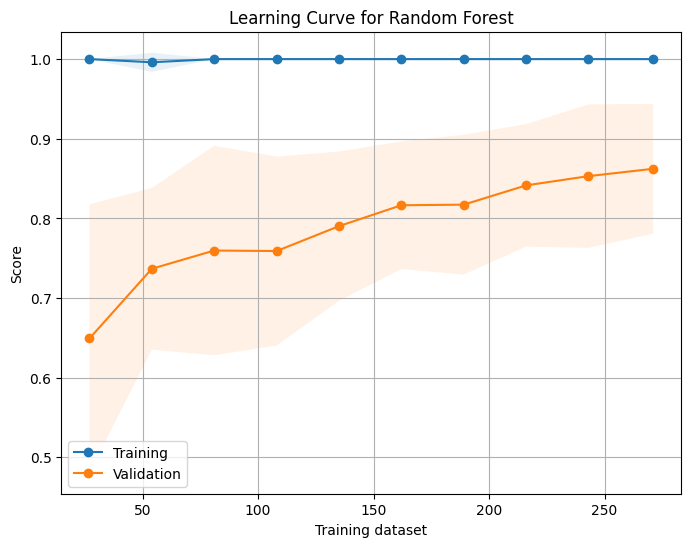

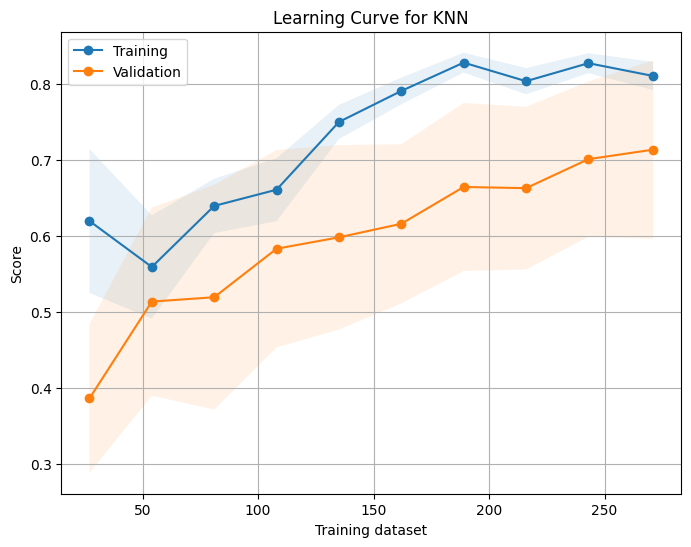

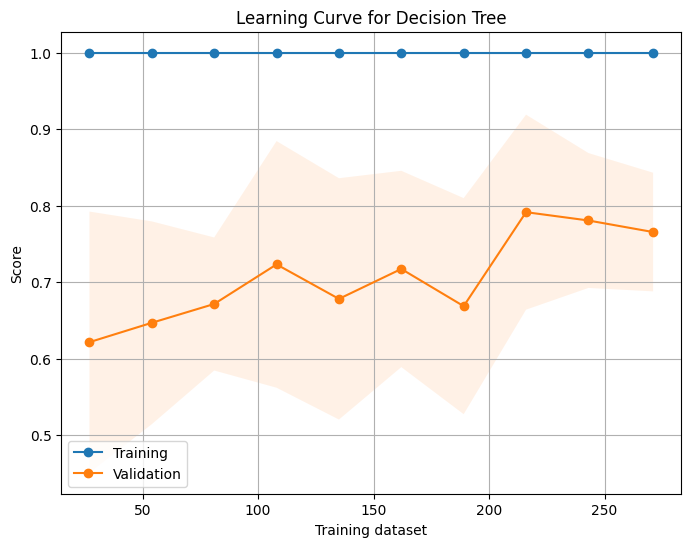

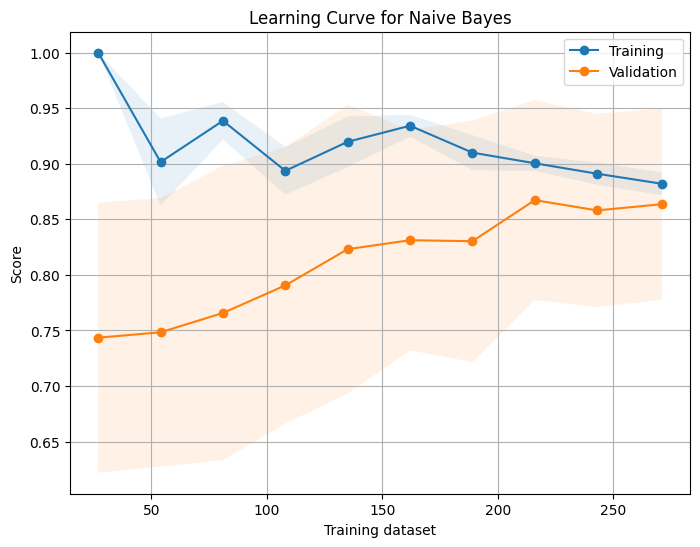

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import learning_curve, KFold
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

#model-model yang akan dievaluasi
models = {
    "Random Forest": RandomForestClassifier(),
    "KNN": KNeighborsClassifier(),
    "Decision Tree": DecisionTreeClassifier(),
    "Naive Bayes": GaussianNB()
}

#dataset x dan y
x = df1.drop('target', axis=1)
y = df1['target']

#jumlah lipatan untuk cross-validation
cv = KFold(n_splits=10, shuffle=True, random_state=42)

#parameter untuk kurva pembelajaran
train_sizes=np.linspace(0.1, 1.0, 10)

# Plot kurva pembelajaran untuk setiap model
for name, model in models.items():
    plt.figure(figsize=(8, 6))
    train_sizes, train_scores, test_scores = learning_curve(
        model, x, y, cv=cv, train_sizes=train_sizes, scoring='recall')

    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1)
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1)
    plt.plot(train_sizes, train_scores_mean, 'o-', label="Training")
    plt.plot(train_sizes, test_scores_mean, 'o-', label="Validation")

    plt.title(f"Learning Curve for {name}")
    plt.xlabel("Training dataset")
    plt.ylabel("Score")
    plt.legend(loc="best")
    plt.grid(True)
    plt.show()


## 7. Penjelasan Visualisasi Learning Curves




> Metrix yang digunakan adalah "recall" karena seperti yang telah dikerjakan pada machine learning model bahwa metrix dengan rata-rata cross validation score terbaik adalah metrix recall.

> Perhatikan grafik yang ditampilkan pada Learning Curva nomor 6 :

1.   **Model Random Forest** -> **Overfitting**
  *   Kurva training tetap sedangkan kurva validasi nya naik
  *   jarak antara kurva train dan kurva validasi jauh

2.   **Model K-Nearest Neighbords (KNN)** -> **Goodfitting**
  *   Kurva Training dan Validation berdekatan
  *   kurva training diatas kurva validasi artinya nilai recall validasi < nilai recall training
  * kurva training maupun validasi meningkat secara signifikan seiring bertambahnya iterasi

3.   **Model Decision Trees** -> **Overfitting**
  *   Kurva training tetap sedangkan kurva validasi nya naik
  *   jarak antara kurva train dan kurva validasi sedikit lebih jauh


4.   **Model Naive Bayes** -> **Underfitting**
  *   Kurva Training turun seiring bertambah iterasi






## 8. Perbaikan Akurasi Merchine Learning model


Referensi : https://www.geeksforgeeks.org/hyperparameter-tuning/

Analisis Menggunakan **Hyperparameter Tuning** dengan **Randomized Search** karena dataset heart setelah cleaning tergolong kecil maka menggunakan Randomized Search lebih efisien.

> Area di bawah kurva ROC (AUC) memberikan gambaran tentang kinerja keseluruhan model. Nilai AUC berkisar dari 0 hingga 1, di mana:
* **AUC = 1** menunjukkan **model sempurna** yang dapat memisahkan sempurna antara kelas positif dan negatif.
* **AUC = 0,5** menunjukkan model yang **tidak memiliki kemampuan diskriminatif** yang lebih baik dari pengambilan keputusan acak.
* **AUC < 0,5** menunjukkan **model yang berkinerja lebih buruk** daripada pengambilan keputusan acak.



In [ ]:
# Model yang mengalami overfitting
overfitting_model_1 = DecisionTreeClassifier(max_depth=5)
overfitting_model_2 = RandomForestClassifier(n_estimators=50, max_depth=10)

# Penyetelan ulang hyperparameter
hyperparameters_1 = {'max_depth': [3, 5, 7]}
hyperparameters_2 = {'n_estimators': [50, 100], 'max_depth': [5, 10]}

# Pemangkasan pohon untuk model Decision Tree
pruned_model_1 = DecisionTreeClassifier(max_depth=3)

# Validasi ulang dan penyesuaian
# Lakukan validasi ulang dengan teknik cross-validation dan evaluasi performa model pada data validasi
# Sesuaikan langkah-langkah perbaikan berdasarkan hasil validasi ulang


### Model Random Forest

In [ ]:
import numpy as np
from sklearn.datasets import make_classification
from sklearn.metrics import roc_auc_score
from scipy.stats import randint
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV

# Generate a synthetic dataset for illustration
x, y = make_classification(n_samples=300, n_features=10, n_informative=6, n_redundant=2, n_classes=2, random_state=42)

# Define the hyperparameter search space
param_dist = {
    "max_depth": [3, 5, 7],
    "max_features": randint(1, 9),
    "min_samples_leaf": randint(1, 9),
    "criterion": ["gini", "entropy"]
}

# Initialize Decision Tree Classifier
tree = RandomForestClassifier()

# Initialize Randomized Search Cross Validation
tree_cv = RandomizedSearchCV(tree, param_dist, cv=5, scoring='roc_auc')

# Fit the model
tree_cv.fit(x, y)

# Print the best parameters and best score
print("Best Hyperparameter Random Forest: {}".format(tree_cv.best_params_))
print("Best AUC score is {}".format(tree_cv.best_score_))

# Get the best model
best_model = tree_cv.best_estimator_

# Make predictions
y_pred = best_model.predict_proba(x)[:, 1]

# Calculate AUC
auc_score = roc_auc_score(y, y_pred)
print("AUC on the entire dataset:", auc_score)


Best Hyperparameter Random Forest: {'criterion': 'entropy', 'max_depth': 7, 'max_features': 4, 'min_samples_leaf': 1}
Best AUC score is 0.9697775305895439
AUC on the entire dataset: 1.0


In [ ]:
from sklearn.model_selection import cross_validate, KFold
from sklearn.ensemble import RandomForestClassifier

# Model yang akan dievaluasi
model = RandomForestClassifier(random_state=42)

# Memisahkan data ke dalam lipatan
kf = KFold(n_splits=10, shuffle=True, random_state=42)

# Validasi silang dengan cross_validate di mana x adalah data fitur, y adalah label target
scoring = ['accuracy','f1','recall', 'precision']
scores = cross_validate(model, x, y, cv=kf, scoring=scoring)

# Cetak hasil validasi silang
for metric in scoring:
    mean_score = np.mean(scores['test_' + metric])
    print("Rata-rata", metric, ":", mean_score)

Rata-rata accuracy : 0.9266666666666667
Rata-rata f1 : 0.9286756825804133
Rata-rata recall : 0.9634045284780578
Rata-rata precision : 0.9006197478991597


### Model K-Nearest Neighbords (KNN)

In [ ]:
import numpy as np
from sklearn.datasets import make_classification
from sklearn.metrics import roc_auc_score
from scipy.stats import randint
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import RandomizedSearchCV

# Menghasilkan dataset sintetis untuk ilustrasi
x, y = make_classification(n_samples=300, n_features=10, n_informative=6, n_redundant=2, n_classes=2, random_state=42)

# Mendefinisikan ruang pencarian hyperparameter
param_dist = {
    "n_neighbors": randint(1, 10),  # Jumlah tetangga yang akan digunakan
    "weights": ['uniform', 'distance'],  # Metode bobot yang digunakan
    "metric": ['euclidean', 'manhattan', 'chebyshev']  # Metrik jarak yang digunakan
}

# Menginisialisasi K-Nearest Neighbors Classifier
knn = KNeighborsClassifier()

# Menginisialisasi Randomized Search Cross Validation
knn_cv = RandomizedSearchCV(knn, param_dist, cv=5, scoring='roc_auc')

# Melatih model
knn_cv.fit(x, y)

# Mencetak parameter terbaik dan skor terbaik
print("Best Hyperparameters KNN :", knn_cv.best_params_)
print("Best AUC score is", knn_cv.best_score_)

# Mendapatkan model terbaik
best_model = knn_cv.best_estimator_

# Melakukan prediksi
y_pred = best_model.predict_proba(x)[:, 1]

# Menghitung AUC
auc_score = roc_auc_score(y, y_pred)
print("AUC pada seluruh dataset:", auc_score)


Best Hyperparameters KNN : {'metric': 'manhattan', 'n_neighbors': 7, 'weights': 'distance'}
Best AUC score is 0.9843333333333334
AUC pada seluruh dataset: 1.0


In [ ]:
from sklearn.model_selection import cross_validate, KFold
from sklearn.neighbors import KNeighborsClassifier

# Model yang akan dievaluasi
model = KNeighborsClassifier()

# Memisahkan data ke dalam lipatan
kf = KFold(n_splits=10, shuffle=True, random_state=42)

# Validasi silang dengan cross_validate di mana x adalah data fitur, y adalah label target
scoring = ['accuracy','f1','recall', 'precision']
scores = cross_validate(model, x, y, cv=kf, scoring=scoring)

# Cetak hasil validasi silang
for metric in scoring:
    mean_score = np.mean(scores['test_' + metric])
    print("Rata-rata", metric, ":", mean_score)

Rata-rata accuracy : 0.9366666666666668
Rata-rata f1 : 0.9333480363722299
Rata-rata recall : 0.9077879228614524
Rata-rata precision : 0.9626373626373625


### Model Decision Trees

In [ ]:
import numpy as np
from sklearn.datasets import make_classification
from sklearn.metrics import roc_auc_score
from scipy.stats import randint
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RandomizedSearchCV

# Generate a synthetic dataset for illustration
x, y = make_classification(n_samples=300, n_features=10, n_informative=6, n_redundant=2, n_classes=2, random_state=42)

# Define the hyperparameter search space
param_dist = {
    "max_depth": [3, 5, 7],
    "max_features": randint(1, 9),
    "min_samples_leaf": randint(1, 9),
    "criterion": ["gini", "entropy"]
}

# Initialize Decision Tree Classifier
tree = DecisionTreeClassifier()

# Initialize Randomized Search Cross Validation
tree_cv = RandomizedSearchCV(tree, param_dist, cv=5, scoring='roc_auc')

# Fit the model
tree_cv.fit(x, y)

# Print the best parameters and best score
print("Best Hyperparameter Decision Tree : {}".format(tree_cv.best_params_))
print("Best AUC score is {}".format(tree_cv.best_score_))

# Get the best model
best_model = tree_cv.best_estimator_

# Make predictions
y_pred = best_model.predict_proba(x)[:, 1]

# Calculate AUC
auc_score = roc_auc_score(y, y_pred)
print("AUC on the entire dataset:", auc_score)


Best Hyperparameter Decision Tree : {'criterion': 'entropy', 'max_depth': 7, 'max_features': 8, 'min_samples_leaf': 6}
Best AUC score is 0.9213281423804227
AUC on the entire dataset: 0.9938663940619583


In [ ]:
from sklearn.model_selection import cross_validate, KFold
from sklearn.tree import DecisionTreeClassifier

# Model yang akan dievaluasi
model = DecisionTreeClassifier(random_state=42)

# Memisahkan data ke dalam lipatan
kf = KFold(n_splits=10, shuffle=True, random_state=42)

# Validasi silang dengan cross_validate di mana x adalah data fitur, y adalah label target
scoring = ['accuracy','f1','recall', 'precision']
scores = cross_validate(model, x, y, cv=kf, scoring=scoring)

# Cetak hasil validasi silang
for metric in scoring:
    mean_score = np.mean(scores['test_' + metric])
    print("Rata-rata", metric, ":", mean_score)

Rata-rata accuracy : 0.8566666666666667
Rata-rata f1 : 0.8598093957392138
Rata-rata recall : 0.8785309096648106
Rata-rata precision : 0.8510285753977704


### Model Naive Bayes

In [ ]:
import numpy as np
from sklearn.datasets import make_classification
from sklearn.metrics import roc_auc_score
from scipy.stats import randint
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import RandomizedSearchCV

# Menghasilkan dataset sintetis untuk ilustrasi
x, y = make_classification(n_samples=300, n_features=10, n_informative=6, n_redundant=2, n_classes=2, random_state=42)

# Mendefinisikan ruang pencarian hyperparameter
param_dist = {
    "priors": [None],  # Anda dapat menentukan probabilitas awal jika memiliki pengetahuan awal
    "var_smoothing": [1e-9, 1e-8, 1e-7, 1e-6, 1e-5]  # Parameter smoothing
}

# Menginisialisasi Gaussian Naive Bayes Classifier
nb = GaussianNB()

# Menginisialisasi Randomized Search Cross Validation
nb_cv = RandomizedSearchCV(nb, param_dist, cv=5, scoring='roc_auc')

# Melatih model
nb_cv.fit(x, y)

# Mencetak parameter terbaik dan skor terbaik
print("Best Hyperparameters Naive Bayes:", nb_cv.best_params_)
print("Best AUC score is", nb_cv.best_score_)

# Mendapatkan model terbaik
best_model = nb_cv.best_estimator_

# Melakukan prediksi
y_pred = best_model.predict_proba(x)[:, 1]

# Menghitung AUC
auc_score = roc_auc_score(y, y_pred)
print("AUC pada seluruh dataset:", auc_score)


Best Hyperparameters Naive Bayes: {'var_smoothing': 1e-09, 'priors': None}
Best AUC score is 0.9186523297491039
AUC pada seluruh dataset: 0.9214631761411619


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:305: UserWarning: The total space of parameters 5 is smaller than n_iter=10. Running 5 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


In [ ]:
from sklearn.model_selection import cross_validate, KFold
from sklearn.naive_bayes import GaussianNB

# Model yang akan dievaluasi
model = GaussianNB()

# Memisahkan data ke dalam lipatan
kf = KFold(n_splits=10, shuffle=True, random_state=42)

# Validasi silang dengan cross_validate di mana x adalah data fitur, y adalah label target
scoring = ['accuracy','f1','recall', 'precision']
scores = cross_validate(model, x, y, cv=kf, scoring=scoring)

# Cetak hasil validasi silang
for metric in scoring:
    mean_score = np.mean(scores['test_' + metric])
    print("Rata-rata", metric, ":", mean_score)

Rata-rata accuracy : 0.8300000000000001
Rata-rata f1 : 0.8298669130676919
Rata-rata recall : 0.8280821775403819
Rata-rata precision : 0.8515934065934067


## 9. Metric Evaluation




*  **Menggunakan Confusion Metrix**

kita gunakan metrix recall karena  :

1. Recall mengukur seberapa baik model dapat mengidentifikasi semua sampel positif yang sebenarnya.
2. Lebih penting digunakan ketika kelas positif (minoritas) lebih penting untuk diidentifikasi dengan benar, misalnya dalam kasus di mana hasil positif memiliki konsekuensi yang tinggi.
3. Cocok digunakan ketika kelas target tidak seimbang, karena recall fokus pada penemuan seluruh sampel positif yang sebenarnya.

Dengan demikian, jika kelas target tidak seimbang atau jika hasil positif memiliki konsekuensi yang penting (misalnya, dalam deteksi penyakit di mana penting untuk menemukan semua kasus positif yang sebenarnya), recall mungkin menjadi metrik yang lebih baik.

**Recall memberikan informasi tentang seberapa baik model dapat mengidentifikasi seluruh kelas positif yang ada dalam data. Semakin tinggi nilai recall, semakin baik model dalam mengidentifikasi kelas positif.**

### Model Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import recall_score

# Membagi dataset menjadi data latih dan data uji
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Mendefinisikan model RandomForestClassifier dengan parameter terbaik yang telah ditemukan
best_params = {'n_estimators': 300, 'max_depth': 7, 'min_samples_split': 5, 'min_samples_leaf': 3, 'max_features': 'sqrt'}
rf_classifier = RandomForestClassifier(**best_params, random_state=42)

# Melatih model Random Forest pada data latih
rf_classifier.fit(x_train, y_train)

# Melakukan prediksi pada data uji
y_pred = rf_classifier.predict(x_test)

# Menghitung akurasi pada data uji
recall = recall_score(y_test, y_pred)
print("Akurasi model Random Forest setelah hyperparameter tuning:", recall)


Akurasi model Random Forest setelah hyperparameter tuning: 1.0


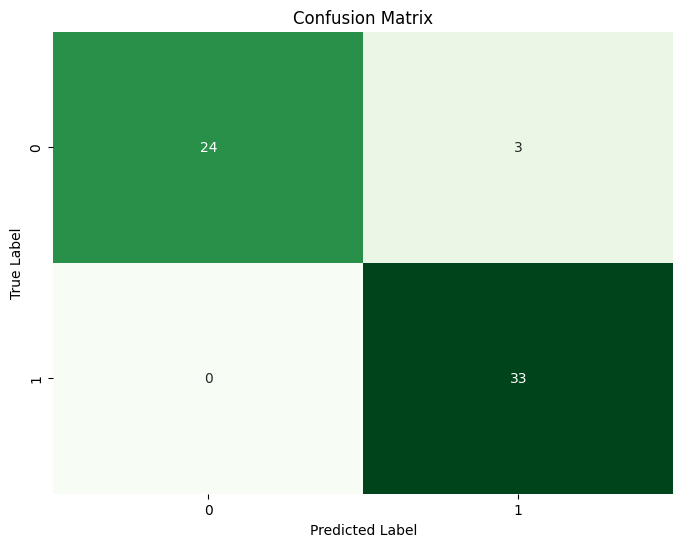

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Menghitung confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Membuat heatmap confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


### Model K-Nearest Neighbords (KNN)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import recall_score

# Membagi dataset menjadi data latih dan data uji
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Mendefinisikan model KNeighborsClassifier dengan parameter terbaik yang telah ditemukan
best_params = {'n_neighbors': 5, 'weights': 'uniform', 'metric': 'euclidean'}
knn_classifier = KNeighborsClassifier(**best_params)

# Melatih model K-Nearest Neighbors pada data latih
knn_classifier.fit(x_train, y_train)

# Melakukan prediksi pada data uji
y_pred = knn_classifier.predict(x_test)

# Menghitung akurasi pada data uji
recall = recall_score(y_test, y_pred)
print("Akurasi model K-Nearest Neighbors setelah hyperparameter tuning:", recall)


Akurasi model K-Nearest Neighbors setelah hyperparameter tuning: 0.9393939393939394


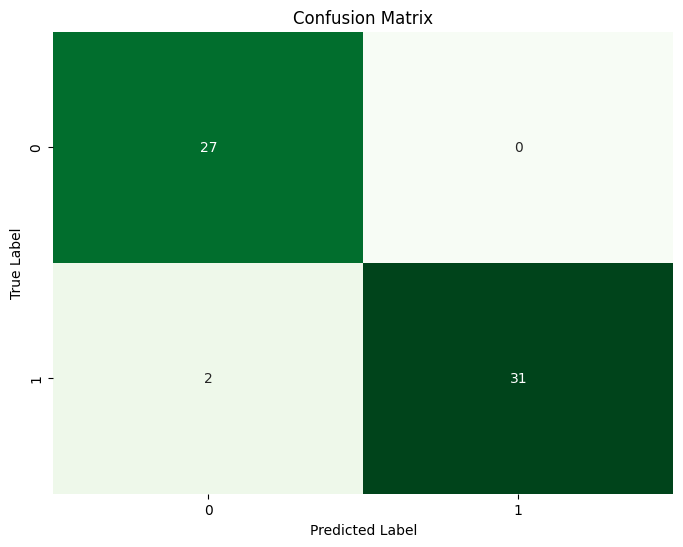

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Menghitung confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Membuat heatmap confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


### Model Decision Trees

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import recall_score

# Membagi dataset menjadi data latih dan data uji
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

# Mendefinisikan model DecisionTreeClassifier dengan parameter terbaik yang telah ditemukan
best_params = {'max_depth': 7, 'min_samples_split': 5, 'min_samples_leaf': 3}
dt_classifier = DecisionTreeClassifier(**best_params, random_state=42)

# Melatih model Decision Tree pada data latih
dt_classifier.fit(x_train, y_train)

# Melakukan prediksi pada data uji
y_pred = dt_classifier.predict(x_test)

# Menghitung akurasi pada data uji
recall = accuracy_score(y_test, y_pred)
print("Akurasi model Decision Tree setelah hyperparameter tuning:", recall)


Akurasi model Decision Tree setelah hyperparameter tuning: 0.9111111111111111


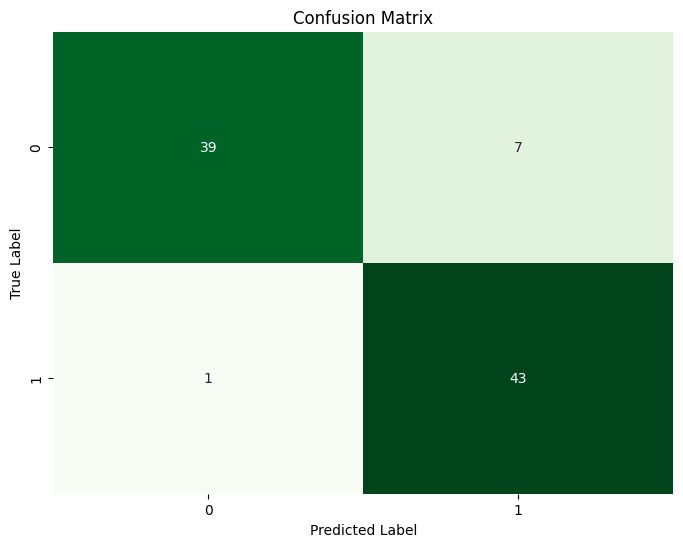

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Menghitung confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Membuat heatmap confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


### Model Niave Bayes

In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import recall_score

# Membagi dataset menjadi data latih dan data uji
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

# Mendefinisikan model Gaussian Naive Bayes (GaussianNB)
nb_classifier = GaussianNB()

# Melatih model Gaussian Naive Bayes pada data latih
nb_classifier.fit(x_train, y_train)

# Melakukan prediksi pada data uji
y_pred = nb_classifier.predict(x_test)

# Menghitung akurasi pada data uji
recall = accuracy_score(y_test, y_pred)
print("Akurasi model Gaussian Naive Bayes setelah hyperparameter tuning:", recall)


Akurasi model Gaussian Naive Bayes setelah hyperparameter tuning: 0.8444444444444444


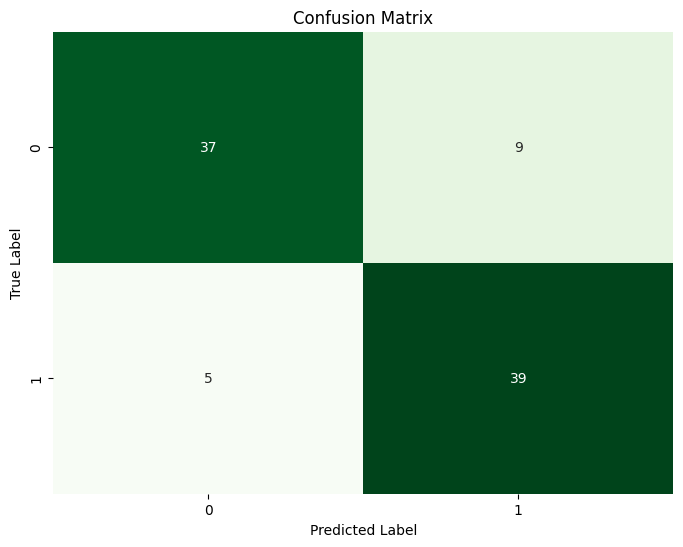

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Menghitung confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Membuat heatmap confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


## 10. Interpretasi Value Metric Evaluation


### Model Random Forest

Model ini memiliki nilai AUC yang mendekti nilai 1.0 yaitu
Best AUC score is 0.9664434556915091
AUC on the entire dataset: 0.9998666607404774
artinya hampir menjadi model sempurna.

Akurasi model Random Forest setelah hyperparameter tuning: 1.0 dengan confusion metrix nya memiliki nilai False Negatif yaitu nol dan metrix nya mengalami kenaikan yaitu :

> Rata-rata accuracy : 0.9266666666666667
  Rata-rata f1 : 0.9286756825804133
  Rata-rata recall : 0.9634045284780578
  Rata-rata precision : 0.9006197478991597



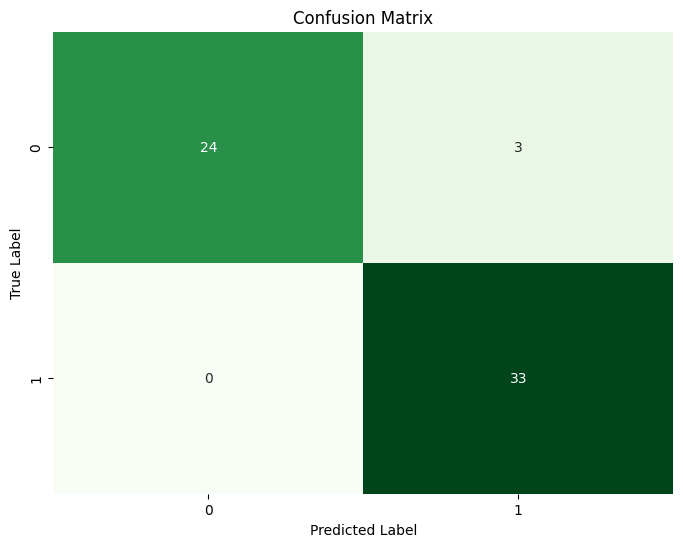

### Model K-Nearest Neighbords

Akurasi model K-Nearest Neighbors setelah hyperparameter tuning: 0.9393939393939394
serta metrix mengalami kenaikan yang cukup signifikan yaitu :
Rata-rata accuracy : 0.9366666666666668
Rata-rata f1 : 0.9333480363722299
Rata-rata recall : 0.9077879228614524
Rata-rata precision : 0.9626373626373625

dimana AUC mendapatkan nilai 1.0 dan
Best AUC score is 0.9838888888888888
AUC pada seluruh dataset: 1.0
confusion metrix yang bagus

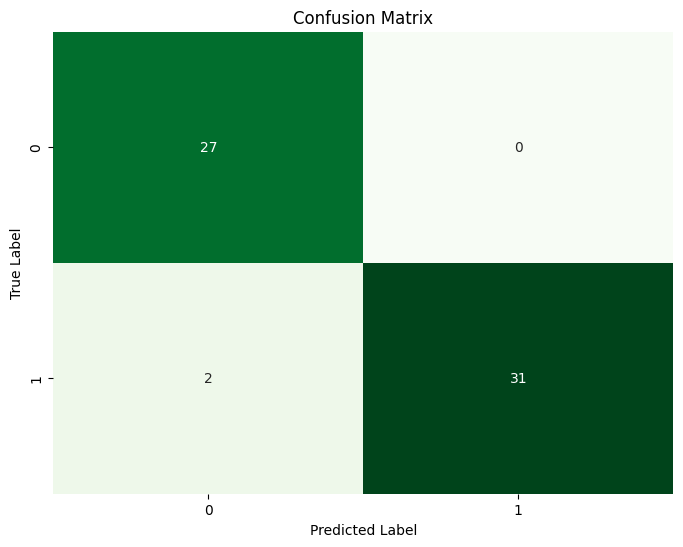

### Model Decision Trees

AUC mendekati nilai 1.0 yang artinya mendekati model sempurna :
Best AUC score is 0.9170862686936101
AUC on the entire dataset: 0.9923329925774479

rata-rata metrix juga mengalami kenaikan yaitu
Rata-rata accuracy : 0.8566666666666667
Rata-rata f1 : 0.8598093957392138
Rata-rata recall : 0.8785309096648106
Rata-rata precision : 0.8510285753977704

akurasi mengalami kenaikan dengan metrix recall,
Akurasi model Decision Tree setelah hyperparameter tuning: 0.9111111111111111

dengan confusion matrix
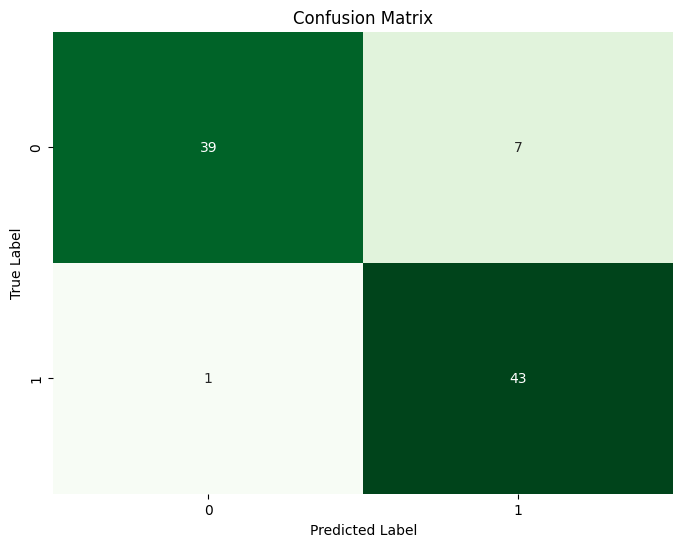


### Model Naive Bayes

AUC sedikit jauh dari angka 1.0 tetapi masih dalam skala 90%
Best AUC score is 0.9186523297491039
AUC pada seluruh dataset: 0.9214631761411619

dengan kenaikan matrix yang tidak terlalu jauh yaitu
Rata-rata accuracy : 0.8300000000000001
Rata-rata f1 : 0.8298669130676919
Rata-rata recall : 0.8280821775403819
Rata-rata precision : 0.8515934065934067

Akurasi model Gaussian Naive Bayes setelah hyperparameter tuning: 0.8444444444444444

dengan confusion metrix nya

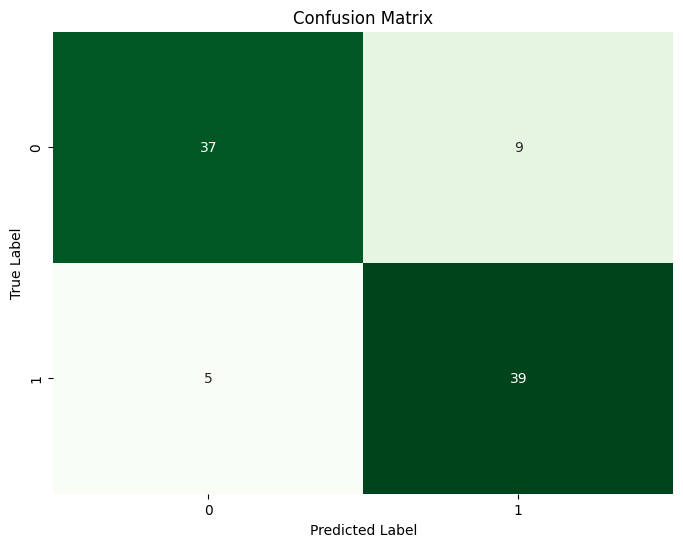

## KESIMPULAN

Dapat disimpulkan bahwa setiap model memiliki kelebihan nya masing-masing, misal Model KNN bagus pada learning curve yaitu Goodfit dan Model Random Forest yang memiliki akurasi terbaik yaitu 1.0 setelah dilakukan metric evaluation.

**Bisa dikatakan bahwa Model Random Forest adalah model terbaik pada dataset Heart Disiase.**

jika ada kesalahan, keliru dan kekurangan mohon maaf serta dinantikan masukan dan sarannya terima kasih.

Sisfy Anjani